In [172]:
!pip install kneed
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage

In [173]:
#making sure revenue data type is in float
print(df.dtypes)

Version              float64
Version Name          object
Start Date            object
End Date              object
5 Star Characters     object
Rerun                float64
Mixed                  int32
Gender                 int32
Revenue              float64
Banner Days          float64
Avg Revenue/Day      float64
cluster4               int32
dtype: object


In [174]:
#Change data type
df.Mixed = df.Mixed.astype(int, copy=False)
df.Gender = df.Gender.astype(int, copy=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Version            39 non-null     float64
 1   Version Name       39 non-null     object 
 2   Start Date         39 non-null     object 
 3   End Date           39 non-null     object 
 4   5 Star Characters  39 non-null     object 
 5   Rerun              39 non-null     float64
 6   Mixed              39 non-null     int32  
 7   Gender             39 non-null     int32  
 8   Revenue            39 non-null     float64
 9   Banner Days        39 non-null     float64
 10  Avg Revenue/Day    39 non-null     float64
 11  cluster4           39 non-null     int32  
dtypes: float64(5), int32(3), object(4)
memory usage: 3.5+ KB


In [175]:
Gen= df[['Gender','Revenue']]
Gen.head()

,Gender,Revenue
0,0,30632752.0
1,1,22750080.0
2,0,13443619.0
3,0,16264892.0
4,0,11816107.0


In [188]:
Run= df[['Rerun','Revenue']]
Run.head()

,Rerun,Revenue
0,0.0,30632752.0
1,0.0,22750080.0
2,0.0,13443619.0
3,0.0,16264892.0
4,0.0,11816107.0


In [195]:
Mix= df[['Mixed','Revenue']]
Mix.head()

,Mixed,Revenue
0,0,30632752.0
1,0,22750080.0
2,0,13443619.0
3,0,16264892.0
4,0,11816107.0


In [208]:
#calculate distortion for a range of number of cluster
distortions= []
for k in range(1,11):
    km = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, tol=1e-04, random_state = 0)
    km.fit(Gen)
    distortions.append(km.inertia_)
print(distortions)

C:\Users\tiffa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2484221520969380.0, 596129678070499.9, 335108565752981.9, 125040090914582.95, 64554223543917.24, 49877208431724.664, 38913881536379.54, 29102383759180.957, 18287390133077.45, 13029312289886.562]


In [206]:
#Elbow
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

2

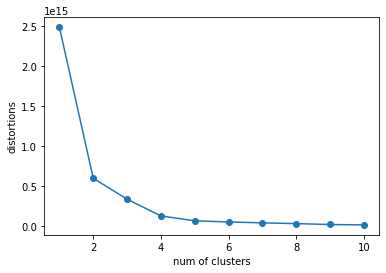

In [207]:
#Draw elbow plot and from that figure out optimal value of k plot
plt.xlabel('num of clusters')
plt.ylabel('distortions')
plt.plot(range(1,11), distortions, marker='o')

#the optimal value of k is 2.

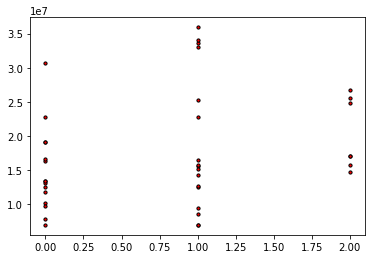

In [181]:
#plotting the data
plt.scatter(Gen.iloc[:, 0], Gen.iloc[:, 1], c='red', marker='o', edgecolor='black', s=10)
plt.show()

In [209]:
#training K-Means clustering
km = KMeans(n_clusters=2, init='k-means++',n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_predict2 = km.fit_predict(Gen)
y_predict2

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

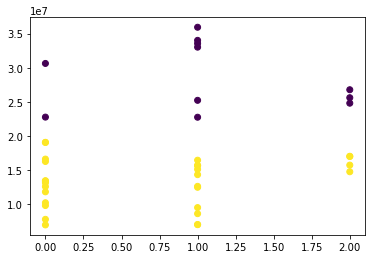

In [210]:
#plotting the trained K-Means clustering
plt.scatter(Gen.iloc[:,0],Gen.iloc[:,1],c=y_predict2)

In [184]:
df['cluster2'] = y_predict2
df.head()

,Version,Version Name,Start Date,End Date,5 Star Characters,Rerun,Mixed,Gender,Revenue,Banner Days,Avg Revenue/Day,cluster4,cluster2
0,1.0,Welcome to Tevyat,25/09/2020,19/10/2020,Venti,0.0,0,0,30632752.0,25.0,1.225310e+06,0,0
1,1.0,Welcome to Tevyat,20/10/2020,2020-10-11 00:00:00,Klee,0.0,0,1,22750080.0,22.0,1.034095e+06,0,0
2,1.1,A New Star Approaches,2020-11-11 00:00:00,30/11/2020,Tartaglia,0.0,0,0,13443619.0,20.0,6.721809e+05,1,1
3,1.1,A New Star Approaches,2020-01-12 00:00:00,22/12/2020,Zhongli,0.0,0,0,16264892.0,22.0,7.393133e+05,1,1
4,1.2,The Chalk Prince and the Dragon,23/12/2020,2021-12-01 00:00:00,Albedo,0.0,0,0,11816107.0,21.0,5.626718e+05,1,1


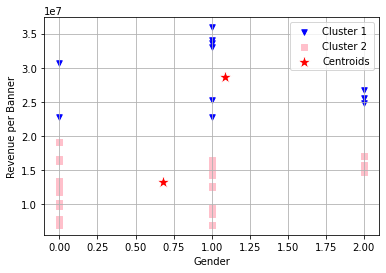

In [185]:
# plot the 2 clusters
plt.scatter(Gen.iloc[y_predict2 == 0, 0], Gen.iloc[y_predict2 == 0, 1], s=30, c='blue', marker='v', edgecolor='blue', label='Cluster 1')

plt.scatter(Gen.iloc[y_predict2 == 1, 0], Gen.iloc[y_predict2 == 1, 1], s=30, c='pink', marker='s', edgecolor='pink', label='Cluster 2')


# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='red', edgecolor='white', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Gender')
plt.ylabel('Revenue per Banner')

plt.grid()
plt.show()

In [186]:
print(f'Silhouette Score(n=2): {silhouette_score(Gen, y_predict2)}')

Silhouette Score(n=2): 0.6818033415481198


In [187]:
#cluster 1
print(Gen.iloc[y_predict2 == 0, 1].max())
print(Gen.iloc[y_predict2 == 0, 1].min())
#cluster 2
print(Gen.iloc[y_predict2 == 1, 1].max())
print(Gen.iloc[y_predict2 == 1, 1].min())

res = (Gen.iloc[y_predict2 == 0, 1].min()+Gen.iloc[y_predict2 == 1, 1].max())/2
print(res)
#20909226

35939066.0
22750080.0
19068372.0
6965445.0
20909226.0


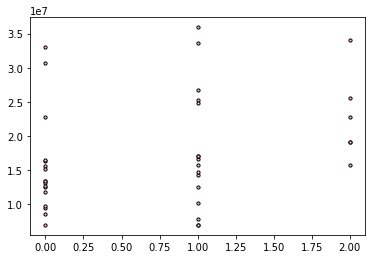

In [189]:
#plotting the data
plt.scatter(Run.iloc[:, 0], Run.iloc[:, 1], c='pink', marker='o', edgecolor='black', s=10)
plt.show()

In [190]:
#training K-Means clustering
km = KMeans(n_clusters=2, init='k-means++',n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_predict3 = km.fit_predict(Run)
y_predict3

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

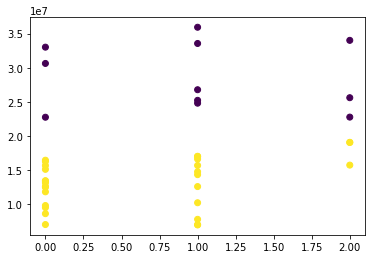

In [191]:
#plotting the trained K-Means clustering
plt.scatter(Run.iloc[:,0],Run.iloc[:,1],c=y_predict3)

In [192]:
df['cluster3'] = y_predict3
df.head()

,Version,Version Name,Start Date,End Date,5 Star Characters,Rerun,Mixed,Gender,Revenue,Banner Days,Avg Revenue/Day,cluster4,cluster2,cluster3
0,1.0,Welcome to Tevyat,25/09/2020,19/10/2020,Venti,0.0,0,0,30632752.0,25.0,1.225310e+06,0,0,0
1,1.0,Welcome to Tevyat,20/10/2020,2020-10-11 00:00:00,Klee,0.0,0,1,22750080.0,22.0,1.034095e+06,0,0,0
2,1.1,A New Star Approaches,2020-11-11 00:00:00,30/11/2020,Tartaglia,0.0,0,0,13443619.0,20.0,6.721809e+05,1,1,1
3,1.1,A New Star Approaches,2020-01-12 00:00:00,22/12/2020,Zhongli,0.0,0,0,16264892.0,22.0,7.393133e+05,1,1,1
4,1.2,The Chalk Prince and the Dragon,23/12/2020,2021-12-01 00:00:00,Albedo,0.0,0,0,11816107.0,21.0,5.626718e+05,1,1,1


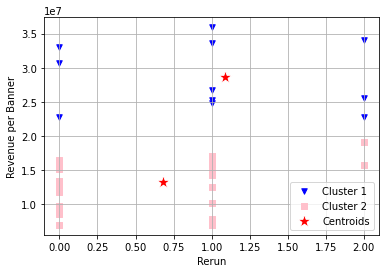

In [213]:
# plot the 3 clusters
plt.scatter(Run.iloc[y_predict3 == 0, 0], Run.iloc[y_predict3 == 0, 1], s=30, c='blue', marker='v', edgecolor='blue', label='Cluster 1')

plt.scatter(Run.iloc[y_predict3 == 1, 0], Run.iloc[y_predict3 == 1, 1], s=30, c='pink', marker='s', edgecolor='pink', label='Cluster 2')


# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='red', edgecolor='white', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Rerun')
plt.ylabel('Revenue per Banner')

plt.grid()
plt.show()

In [214]:
print(f'Silhouette Score(n=2): {silhouette_score(Run, y_predict3)}')

Silhouette Score(n=2): 0.6818033415480652


In [215]:
#cluster 1
print(Run.iloc[y_predict3 == 0, 1].max())
print(Run.iloc[y_predict3 == 0, 1].min())
#cluster 2
print(Run.iloc[y_predict3 == 1, 1].max())
print(Run.iloc[y_predict3 == 1, 1].min())

res1 = (Run.iloc[y_predict3 == 0, 1].min()+Run.iloc[y_predict3 == 1, 1].max())/2
print(res1)
#20909226

35939066.0
22750080.0
19068372.0
6965445.0
20909226.0


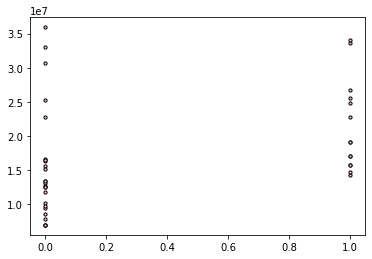

In [196]:
#plotting the data
plt.scatter(Mix.iloc[:, 0], Run.iloc[:, 1], c='pink', marker='o', edgecolor='black', s=10)
plt.show()

In [197]:
#training K-Means clustering
km = KMeans(n_clusters=2, init='k-means++',n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_predict4 = km.fit_predict(Mix)
y_predict4

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

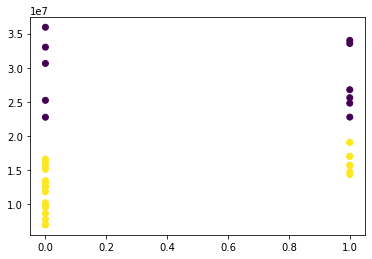

In [198]:
#plotting the trained K-Means clustering
plt.scatter(Mix.iloc[:,0],Mix.iloc[:,1],c=y_predict4)

In [163]:
df['cluster4'] = y_predict4
df.head()

,Version,Version Name,Start Date,End Date,5 Star Characters,Rerun,Mixed,Gender,Revenue,Banner Days,Avg Revenue/Day,cluster4
0,1.0,Welcome to Tevyat,25/09/2020,19/10/2020,Venti,0.0,0,0,30632752.0,25.0,1.225310e+06,0
1,1.0,Welcome to Tevyat,20/10/2020,2020-10-11 00:00:00,Klee,0.0,0,1,22750080.0,22.0,1.034095e+06,0
2,1.1,A New Star Approaches,2020-11-11 00:00:00,30/11/2020,Tartaglia,0.0,0,0,13443619.0,20.0,6.721809e+05,1
3,1.1,A New Star Approaches,2020-01-12 00:00:00,22/12/2020,Zhongli,0.0,0,0,16264892.0,22.0,7.393133e+05,1
4,1.2,The Chalk Prince and the Dragon,23/12/2020,2021-12-01 00:00:00,Albedo,0.0,0,0,11816107.0,21.0,5.626718e+05,1


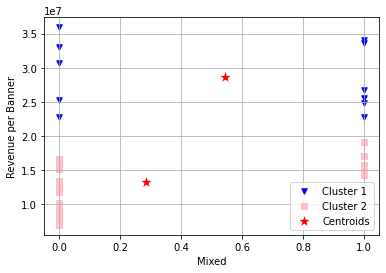

In [165]:
# plot the 2 clusters
plt.scatter(Mix.iloc[y_predict4 == 0, 0], Mix.iloc[y_predict4 == 0, 1], s=30, c='blue', marker='v', edgecolor='blue', label='Cluster 1')

plt.scatter(Mix.iloc[y_predict4 == 1, 0], Mix.iloc[y_predict4 == 1, 1], s=30, c='pink', marker='s', edgecolor='pink', label='Cluster 2')

# plot the centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='red', edgecolor='white', label='Centroids')
plt.legend(scatterpoints=1)
plt.xlabel('Mixed')
plt.ylabel('Revenue per Banner')

plt.grid()
plt.show()

In [171]:
print(f'Silhouette Score(n=2): {silhouette_score(Mix, y_predict4)}')

Silhouette Score(n=2): 0.6818033415481284


In [216]:
#cluster 1
print(Mix.iloc[y_predict2 == 0, 1].max())
print(Mix.iloc[y_predict2 == 0, 1].min())
#cluster 2
print(Mix.iloc[y_predict2 == 1, 1].max())
print(Mix.iloc[y_predict2 == 1, 1].min())

res2 = (Mix.iloc[y_predict2 == 0, 1].min()+Mix.iloc[y_predict2 == 1, 1].max())/2
print(res2)
#20909226

35939066.0
22750080.0
19068372.0
6965445.0
20909226.0


In [225]:
df=pd.read_excel("Genshin Impact Revenue.xlsx")
df.dropna(inplace=True)

#Change data type
df.Mixed = df.Mixed.astype(int, copy=False)
df.Gender = df.Gender.astype(int, copy=False)

#Setting data
data = df.iloc[:,[5,6,7,8,9]]

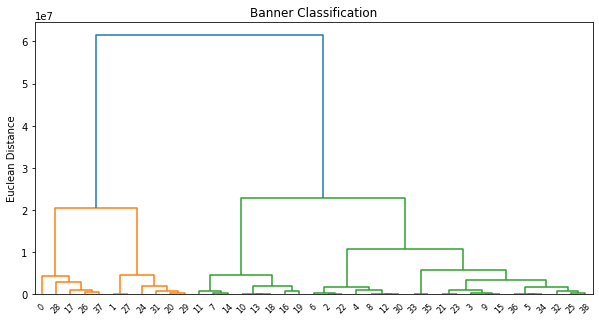

In [226]:
#Hierarchical Clustering - Dendrogram
linkage_data = linkage(data, method='ward', metric='euclidean') #Create linkage and calculate euclidean

fig, plot = plt.subplots(figsize=(10,5))

dendrogram(linkage_data) #Create Dendrogram

plot.set_ylabel("Euclean Distance")
plot.set_title("Banner Classification")

plt.show()

In [227]:
print(linkage_data) #(Cluster, Cluster, Euclean Distance, Singletons)

[[5.00000000e+00 3.40000000e+01 1.19220003e+04 2.00000000e+00]
 [1.30000000e+01 1.80000000e+01 1.47950001e+04 2.00000000e+00]
 [3.30000000e+01 3.50000000e+01 1.63490000e+04 2.00000000e+00]
 [1.00000000e+00 2.70000000e+01 1.73750002e+04 2.00000000e+00]
 [2.10000000e+01 2.30000000e+01 3.16600000e+04 2.00000000e+00]
 [1.20000000e+01 3.00000000e+01 3.26260000e+04 2.00000000e+00]
 [2.00000000e+00 2.20000000e+01 3.95470001e+04 2.00000000e+00]
 [1.00000000e+01 4.00000000e+01 5.55786237e+04 3.00000000e+00]
 [3.60000000e+01 3.90000000e+01 6.44334449e+04 3.00000000e+00]
 [8.00000000e+00 4.40000000e+01 1.40230298e+05 3.00000000e+00]
 [9.00000000e+00 1.50000000e+01 1.63203000e+05 2.00000000e+00]
 [7.00000000e+00 1.40000000e+01 3.01314000e+05 2.00000000e+00]
 [3.00000000e+00 4.90000000e+01 3.09131232e+05 3.00000000e+00]
 [6.00000000e+00 4.50000000e+01 3.21850258e+05 3.00000000e+00]
 [2.50000000e+01 3.80000000e+01 3.50952000e+05 2.00000000e+00]
 [2.00000000e+01 2.90000000e+01 3.85741000e+05 2.000000